# Generating Figures

###### Scope: Our project is to uncover data trends among all star MLB pitchers from 2016-2021. We will examine relationships between their strikeout %, ERA (earned run average) , BB (walk)%, in their all star seasons, as well as some of their physical dimensions and place of birth (state if domestic, country if foreign born).

In [23]:
import pandas as pd
import requests
import json
from pprint import pprint
import csv
from matplotlib import pyplot as plt
import numpy as np

In [98]:
fpath1 = 'Resources/roster_and_stats_merged.csv'
fpath2 = 'Resources/dimensions_dict.csv'

allstar_df = pd.read_csv(fpath1)
allstar_df

league_df = pd.read_csv(fpath2)
league_df

# Grabbing csv data generated in 'Cleaning DataFrames.ipynb'
stats_df = pd.read_csv(fpath1,index_col=0)
players_df = pd.read_csv(fpath2,index_col=0)


In [99]:
stats_df.head()

,Year,Player Name,Shortname,Age,ERA,ERA+,K%,BB%
0,2019,Shane Bieber,biebesh01,24.0,3.28,147.0,0.302,0.047
1,2019,Aroldis Chapman,chapmar01,31.0,2.21,206.0,0.362,0.106
2,2019,Gerrit Cole,colege01,28.0,2.50,185.0,0.399,0.059
3,2019,Lucas Giolito,giolilu01,24.0,3.41,134.0,0.323,0.081
4,2019,Shane Greene,greensh02,30.0,2.30,207.0,0.254,0.068


In [100]:
players_df = players_df.replace({'Dominican Republic':'Dom. Rep.'})
players_df.head(2)

,position,birth_country,weight,birth_state,name_display_first_last,college,height_inches,name_display_roster,sport_code,bats,...,league,name_display_last_first,position_id,high_school,name_use,player_id,name_last,team_id,service_years,active_sw
0,P,USA,200,CA,Shane Bieber,UC Santa Barbara,3,Bieber,mlb,R,...,AL,"Bieber, Shane",1,"Laguna Hills, CA",Shane,669456,Bieber,114,NaN,Y
1,P,Cuba,218,NaN,Aroldis Chapman,NaN,4,"Chapman, A",mlb,L,...,AL,"Chapman, Aroldis",1,NaN,Aroldis,547973,Chapman,147,NaN,Y


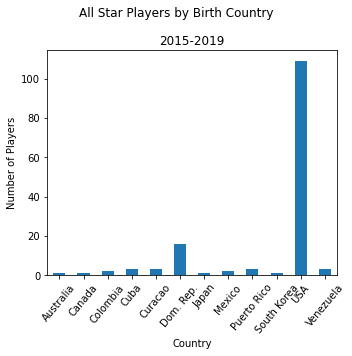

In [286]:
# Creating group based on country
country_grp = players_df.groupby(['birth_country'])['birth_country'].count()

# Plot Country group data
title = 'All Star Players by Birth Country'
subtitle = '2015-2019'

country_grp.plot(kind='bar',title=subtitle, figsize=(5,5),
                 xlabel='Country',ylabel='Number of Players',rot=50)
plt.suptitle(title)
plt.tight_layout()


# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}.png')

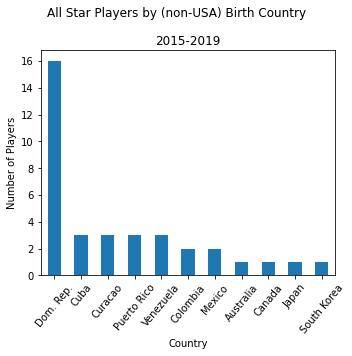

In [327]:
# Creating group based on (non-US) country
country_grp2 = country_grp[country_grp.index != 'USA']

# Filtering for non USA born players
as_us = players_df[players_df['birth_country']=='USA']
state_grp = as_us.groupby(["birth_state"])['birth_state'].count()

# Building sortable dataframe for state group
df = pd.DataFrame(country_grp2)
df2 = df.rename(columns={"birth_country": "num"}).sort_values(
    by=['num'], axis=0, ascending= False)

# Plot Country group data
title = 'All Star Players by (non-USA) Birth Country'
subtitle = '2015-2019'

df2.plot(kind='bar',title=subtitle, figsize=(5,5),
                 xlabel='Country',ylabel='Number of Players',rot=50)
plt.suptitle(title)
plt.tight_layout()
plt.legend().remove()

# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}.png')

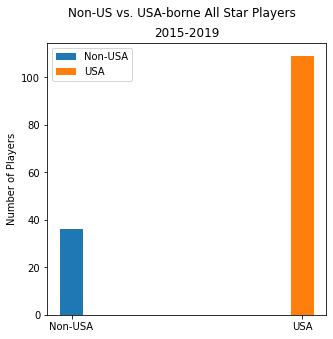

<Figure size 360x360 with 0 Axes>

In [316]:
# Creating US and non-US groups
country_df = pd.DataFrame(country_grp)
non_s = country_df.loc[country_df.index != 'USA'].sum()
non = int(non_s['birth_country'])

usa_s = country_df.loc[country_df.index == 'USA'].sum()
usa = int(usa_s['birth_country'])


# Plot Country group data
labels = ['Non-USA','USA']
xvals = range(len(labels))

fig=plt.figure(figsize=(5,5))
plt.bar(xvals[0], non, width=0.1, label="Non-USA")
plt.bar(xvals[1], usa, width=0.1, label = "USA")
plt.legend()

plt.xticks(xvals, labels=labels)
title = 'Non-US vs. USA-borne All Star Players'
subtitle = '2015-2019'
plt.title(subtitle)
plt.suptitle(title)
plt.ylabel('Number of Players')

plt.figure(figsize=(5,5))
plt.tight_layout()

# Commented-out to prevent regenerating file
fig.savefig(f'Images/{title}.png')

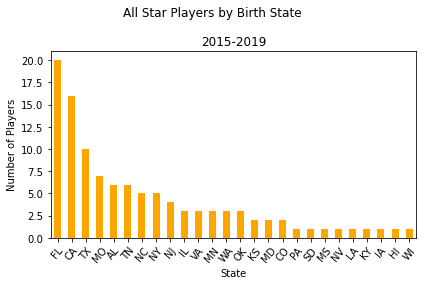

In [330]:
# Filtering for USA born players, and grouping by state
as_us = players_df[players_df['birth_country']=='USA']
state_grp = as_us.groupby(["birth_state"])['birth_state'].count()

# Building sortable dataframe for state group
df = pd.DataFrame(state_grp)
df2 = df.rename(columns={"birth_state": "num"}).sort_values(
    by=['num'], axis=0, ascending= False)

# Plot State data

title = 'All Star Players by Birth State'
subtitle = '2015-2019'

df2.plot(kind='bar',title=subtitle, color='orange',
                 xlabel='State',ylabel='Number of Players',rot=50)
plt.suptitle(title)
plt.tight_layout()
plt.legend().remove()
# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}.png')

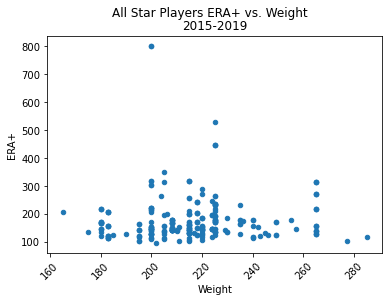

In [256]:
# Merge player dimensions into statistic dataframe
by_weight = pd.merge(players_df,stats_df,how='left',left_on='name_display_first_last',right_on='Player Name')

# Plot ERA+ against weight
title = 'All Star Players ERA+ vs. Weight'
subtitle = '2015-2019'

by_weight.plot('weight','ERA+',kind='scatter', title=subtitle,
               rot=45,xlabel='Weight')
plt.suptitle(title)

# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}.png')


Part 2

In [14]:
fpath3 = 'Resources/league_stats.csv'

In [16]:
# Generating allstar dataframe
allstar_df = pd.read_csv(fpath1)

# Generating league-wide dataframe
league_df = pd.read_csv(fpath3)

In [197]:
allstar_df.head(2)

,Unnamed: 0,Year,Player Name,Shortname,Age,ERA,ERA+,K%,BB%
0,0,2019,Shane Bieber,biebesh01,24.0,3.28,147.0,0.302,0.047
1,1,2019,Aroldis Chapman,chapmar01,31.0,2.21,206.0,0.362,0.106


In [198]:
league_df.head(2)

,Unnamed: 0,position,birth_country,weight,birth_state,name_display_first_last,college,height_inches,name_display_roster,sport_code,...,league,name_display_last_first,position_id,high_school,name_use,player_id,name_last,team_id,service_years,active_sw
0,0,P,USA,200,CA,Shane Bieber,UC Santa Barbara,3,Bieber,mlb,...,AL,"Bieber, Shane",1,"Laguna Hills, CA",Shane,669456,Bieber,114,NaN,Y
1,1,P,Cuba,218,NaN,Aroldis Chapman,NaN,4,"Chapman, A",mlb,...,AL,"Chapman, Aroldis",1,NaN,Aroldis,547973,Chapman,147,NaN,Y


In [19]:
# Grouping All-Stars by year to summarize statistical trends
allstar_year_group = allstar_df.groupby('Year')
allstar_year_mean = allstar_year_group.mean()
allstar_year_df = pd.DataFrame(allstar_year_mean)
allstar_year_df = allstar_year_df.reset_index()
allstar_year_df.head(2)

,Year,Unnamed: 0,Age,ERA,ERA+,K%,BB%
0,2015,137.0,28.000000,2.558929,171.464286,0.266857,0.068929
1,2016,105.5,28.970588,2.735000,178.176471,0.279765,0.073353


In [21]:
# Grouping League by year to summarize statistical trends
league_year_group = league_df.groupby('Year')
league_year_mean = league_year_group.mean()
league_year_df = pd.DataFrame(league_year_mean)
league_year_df = league_year_df.reset_index()
league_year_df.head(2)

,Year,Unnamed: 0,Age,ERA,ERA+,K%,BB%
0,2015,4234.953177,28.056856,4.398278,108.919732,0.200978,0.084224
1,2016,3495.301003,27.884615,4.813110,108.411371,0.207579,0.088719


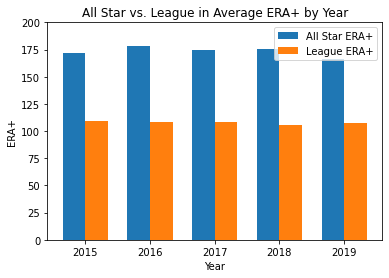

<Figure size 432x288 with 0 Axes>

In [257]:
# Defining stats to include in plot
a = 'Year'
b = 'ERA+'

labels_year = league_year_df[a].tolist()
star_ERA = allstar_year_df[b].tolist()
league_ERA = league_year_df[b].tolist()


x = np.arange(len(labels_year))  # the label locations
width = 0.35  # the width of the bars

# Building Bar plots of data
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, star_ERA, width, label=f'All Star {b}')
rects2 = ax.bar(x + width/2, league_ERA, width, label=f'League {b}')

plt.legend()
plt.xticks(np.arange(5), labels=labels_year)
plt.title(f'All Star vs. League in Average {b} by Year')
plt.xlabel(f'{a}')
plt.ylabel(f'{b}')
plt.ylim((0,200))

plt.show()

# Commented-out to prevent regenerating file
plt.savefig('Images/Allstar_vs_League_ERA+.png',dpi=400)

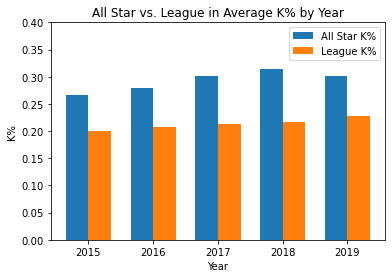

<Figure size 432x288 with 0 Axes>

In [258]:
# Defining stats to include in plot
a = 'Year'
b = 'K%'

labels_year = league_year_df[a].tolist()
star_K = allstar_year_df[b].tolist()
league_K = league_year_df[b].tolist()

x = np.arange(len(labels_year))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, star_K, width, label=f'All Star {b}')
rects2 = ax.bar(x + width/2, league_K, width, label=f'League {b}')

plt.legend()
plt.xticks(np.arange(5), labels=labels_year)
plt.title(f'All Star vs. League in Average {b} by Year')
plt.xlabel(f'{a}')
plt.ylabel(f'{b}')
plt.ylim((0,0.4))

plt.show()

# Commented-out to prevent regenerating file
plt.savefig('Images/Allstar_vs_League_K%.png',dpi=400)

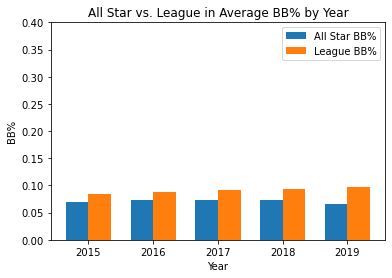

<Figure size 432x288 with 0 Axes>

In [259]:
# Defining stats to include in plot
a = 'Year'
b = 'BB%'

labels_year = league_year_df[a].tolist()
star_BB = allstar_year_df[b].tolist()
league_BB = league_year_df[b].tolist()

x = np.arange(len(labels_year))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, star_BB, width, label=f'All Star {b}')
rects2 = ax.bar(x + width/2, league_BB, width, label=f'League {b}')

plt.legend()
plt.xticks(np.arange(5), labels=labels_year)
plt.title(f'All Star vs. League in Average {b} by Year')
plt.xlabel(f'{a}')
plt.ylabel(f'{b}')
plt.ylim((0,0.4))

plt.show()

# Commented-out to prevent regenerating file
plt.savefig('Images/Allstar_vs_League_BB%.png',dpi=400)

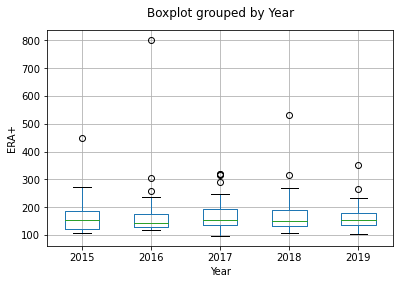

In [260]:
# Generating box plot of ERA data
fig = allstar_df.boxplot("ERA+", by="Year")
fig.set_title('')
fig.set_ylabel('ERA+')

# Commented-out to prevent regenerating file
plt.savefig('Images/Allstar_ERA+_Boxplot.png',dpi=400)

### Starting scatter plot trend analysis

In [46]:
# Cleaning up 'dimensions_dict.csv' data set to display height and weight
dimensions = pd.read_csv(fpath2)
dimensions2 = dimensions.iloc[:,[1,2,3,4,5,6,7,11,26,12,14,16]]
dimensions3 = dimensions2.iloc[:,[4,2,10,6,1,3,11]]
dimensions3.head(2)

,name_display_first_last,weight,height_feet,height_inches,birth_country,birth_state,team_full
0,Shane Bieber,200,6,3,USA,CA,Cleveland Indians
1,Aroldis Chapman,218,6,4,Cuba,NaN,New York Yankees


In [48]:
# Additional cleaning to get height and weight
height_df = dimensions3.copy()

# Convert height into single dimension (inches)
height_df['height'] = height_df['height_feet']*12+height_df['height_inches']
height_df = height_df.rename(columns={"name_display_first_last": "Player Name"})

# Filtering out extra columns
height_df = height_df.iloc[:,[0,1,7]]
height_df

,Player Name,weight,height
0,Shane Bieber,200,75
1,Aroldis Chapman,218,76
2,Gerrit Cole,220,76
3,Lucas Giolito,245,78
4,Shane Greene,200,76
...,...,...,...
140,Kelvin Herrera,220,70
141,Darren O'Day,220,76
142,David Price,215,77
143,Chris Sale,183,78


In [227]:
# Merging the player dimensions into the allstar dataframe
# Cleaning duplicates and NA values
merge_dim = pd.merge(height_df,allstar_df,left_on='Player Name', right_on='Player Name',how ='left')
merge_dim = merge_dim.drop_duplicates()
merge_dim = merge_dim.dropna()
merge_dim.head(2)

,Player Name,weight,height,Unnamed: 0,Year,Shortname,Age,ERA,ERA+,K%,BB%
0,Shane Bieber,200,75,0.0,2019.0,biebesh01,24.0,3.28,147.0,0.302,0.047
1,Aroldis Chapman,218,76,1.0,2019.0,chapmar01,31.0,2.21,206.0,0.362,0.106


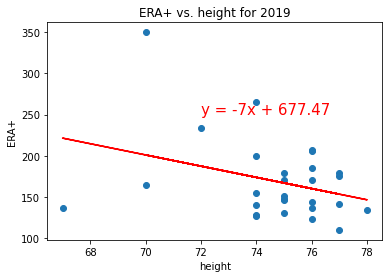

In [261]:
year = 2019
x_axis = 'height'
y_axis = 'ERA+'
title = f'{y_axis} vs. {x_axis} for {year}'

ht_2019 = merge_dim.loc[merge_dim['Year'] == year,:]
from scipy.stats import linregress

x_values = ht_2019[x_axis]
y_values = ht_2019[y_axis]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)

# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}_regression.png',dpi=400)

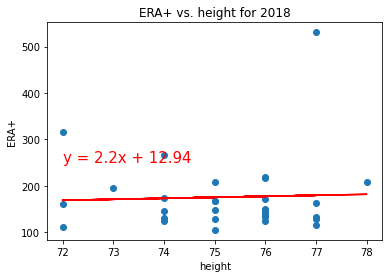

In [262]:
year = 2018
x_axis = 'height'
y_axis = 'ERA+'
title = f'{y_axis} vs. {x_axis} for {year}'

ht_2019 = merge_dim.loc[merge_dim['Year'] == year,:]
from scipy.stats import linregress

x_values = ht_2018[x_axis]
y_values = ht_2018[y_axis]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)

# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}_regression.png',dpi=400)

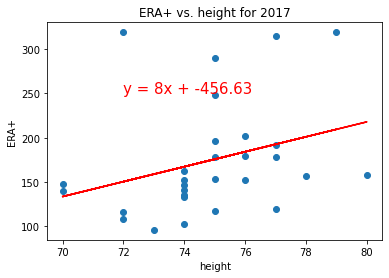

In [263]:
year = 2017
x_axis = 'height'
y_axis = 'ERA+'
title = f'{y_axis} vs. {x_axis} for {year}'

ht_2019 = merge_dim.loc[merge_dim['Year'] == year,:]
from scipy.stats import linregress

x_values = ht_2017[x_axis]
y_values = ht_2017[y_axis]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)

# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}_regression.png',dpi=400)

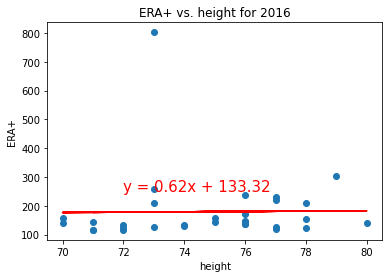

In [264]:
year = 2016
x_axis = 'height'
y_axis = 'ERA+'
title = f'{y_axis} vs. {x_axis} for {year}'

ht_2019 = merge_dim.loc[merge_dim['Year'] == year,:]
from scipy.stats import linregress

x_values = ht_2016[x_axis]
y_values = ht_2016[y_axis]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)

# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}_regression.png',dpi=400)

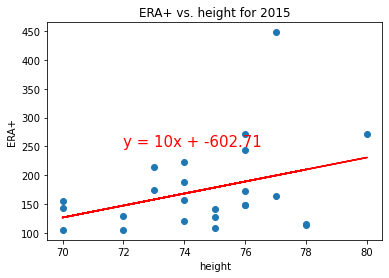

In [265]:
year = 2015
x_axis = 'height'
y_axis = 'ERA+'
title = f'{y_axis} vs. {x_axis} for {year}'

ht_2019 = merge_dim.loc[merge_dim['Year'] == year,:]
from scipy.stats import linregress

x_values = ht_2015[x_axis]
y_values = ht_2015[y_axis]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)

# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}_regression.png',dpi=400)

298.625


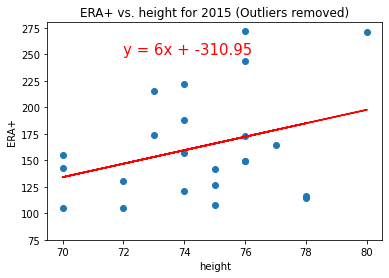

In [266]:
# Setting parameters for kernel
year = 2015
x_axis = 'height'
y_axis = 'ERA+'
title = f'{y_axis} vs. {x_axis} for {year} (Outliers removed)'

# Grabbing all stars for selected year
df = merge_dim.loc[merge_dim['Year'] == year,:]
era = df['ERA+']

# Building quartiles to filter out outliers
quartiles = era.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25] 
upperq = quartiles[0.75]
iqr = upperq-lowerq 
lower_bound = lowerq - (1.5*iqr) 
upper_bound = upperq + (1.5*iqr) 
print(upper_bound)

# Removing outliers from data set for this year
df2= df.loc[df['ERA+'] < upper_bound,:]

# Gathering data for plotting
x_values = df2[x_axis]
y_values = df2[y_axis]

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.ylim(75,280)

# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}_regression.png',dpi=400)

244.0


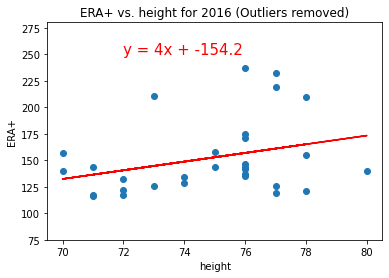

In [267]:
# Setting parameters for kernel
year = 2016
x_axis = 'height'
y_axis = 'ERA+'
title = f'{y_axis} vs. {x_axis} for {year} (Outliers removed)'

# Grabbing all stars for selected year
df = merge_dim.loc[merge_dim['Year'] == year,:]
era = df['ERA+']

# Building quartiles to filter out outliers
quartiles = era.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25] 
upperq = quartiles[0.75]
iqr = upperq-lowerq 
lower_bound = lowerq - (1.5*iqr) 
upper_bound = upperq + (1.5*iqr) 
print(upper_bound)

# Removing outliers from data set for this year
df2= df.loc[df['ERA+'] < upper_bound,:]

# Gathering data for plotting
x_values = df2[x_axis]
y_values = df2[y_axis]

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.ylim(75,280)

# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}_regression.png',dpi=400)

277.5


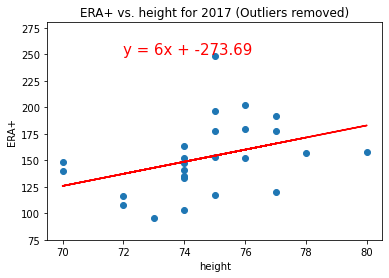

In [268]:
# Setting parameters for kernel
year = 2017
x_axis = 'height'
y_axis = 'ERA+'
title = f'{y_axis} vs. {x_axis} for {year} (Outliers removed)'

# Grabbing all stars for selected year
df = merge_dim.loc[merge_dim['Year'] == year,:]
era = df['ERA+']

# Building quartiles to filter out outliers
quartiles = era.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25] 
upperq = quartiles[0.75]
iqr = upperq-lowerq 
lower_bound = lowerq - (1.5*iqr) 
upper_bound = upperq + (1.5*iqr) 
print(upper_bound)

# Removing outliers from data set for this year
df2= df.loc[df['ERA+'] < upper_bound,:]

# Gathering data for plotting
x_values = df2[x_axis]
y_values = df2[y_axis]

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.ylim(75,280)

# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}_regression.png',dpi=400)

278.375


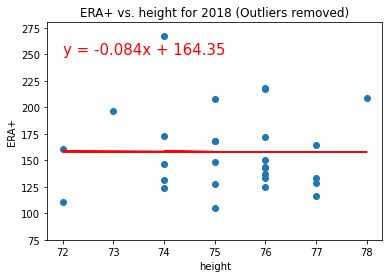

In [269]:
# Setting parameters for kernel
year = 2018
x_axis = 'height'
y_axis = 'ERA+'
title = f'{y_axis} vs. {x_axis} for {year} (Outliers removed)'

# Grabbing all stars for selected year
df = merge_dim.loc[merge_dim['Year'] == year,:]
era = df['ERA+']

# Building quartiles to filter out outliers
quartiles = era.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25] 
upperq = quartiles[0.75]
iqr = upperq-lowerq 
lower_bound = lowerq - (1.5*iqr) 
upper_bound = upperq + (1.5*iqr) 
print(upper_bound)

# Removing outliers from data set for this year
df2= df.loc[df['ERA+'] < upper_bound,:]

# Gathering data for plotting
x_values = df2[x_axis]
y_values = df2[y_axis]

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.ylim(75,280)

# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}_regression.png',dpi=400)

245.75


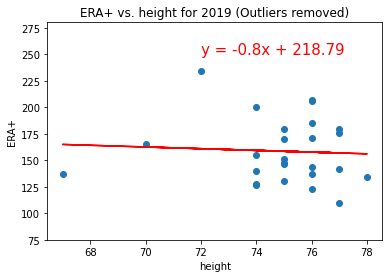

In [270]:
# Setting parameters for kernel
year = 2019
x_axis = 'height'
y_axis = 'ERA+'
title = f'{y_axis} vs. {x_axis} for {year} (Outliers removed)'

# Grabbing all stars for selected year
df = merge_dim.loc[merge_dim['Year'] == year,:]
era = df['ERA+']

# Building quartiles to filter out outliers
quartiles = era.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25] 
upperq = quartiles[0.75]
iqr = upperq-lowerq 
lower_bound = lowerq - (1.5*iqr) 
upper_bound = upperq + (1.5*iqr) 
print(upper_bound)

# Removing outliers from data set for this year
df2= df.loc[df['ERA+'] < upper_bound,:]

# Gathering data for plotting
x_values = df2[x_axis]
y_values = df2[y_axis]

#Regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.ylim(75,280)

# Commented-out to prevent regenerating file
plt.savefig(f'Images/{title}_regression.png',dpi=400)

In [215]:
a= allstar_df.loc[allstar_df['ERA+']>400,:]
b= a.loc[a['Year']==2018,:]
b

,Unnamed: 0,Year,Player Name,Shortname,Age,ERA,ERA+,K%,BB%
58,58,2018,Blake Treinen,treinbl01,30.0,0.78,531.0,0.318,0.067
